### Type of Models

sequential vs Functional






In [1]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
path = "C:\\CDAC\\ML\\Topic12\\Lab\\lung_data.csv"
df = read_csv(path)

In [12]:
df.shape

(324, 35)

In [13]:
df.describe()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.743827,0.586420,2.530864,0.864198,0.052469,30.188272,0.703704,0.759259,0.280864,5.442901,...,518.472222,3.937562,2.076883,48.444444,0.944444,0.870370,0.595679,0.521605,64.188272,1.296296
std,11.002637,0.493237,2.429623,0.343109,0.261622,16.419945,0.457330,0.565308,0.450116,4.717792,...,536.279128,1.575008,0.915411,27.232516,0.229416,0.336415,0.491519,0.500306,22.661837,0.457330
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,110.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
25%,47.000000,0.000000,0.000000,1.000000,0.000000,19.750000,0.000000,0.000000,0.000000,2.875000,...,322.000000,3.400000,1.607500,29.000000,1.000000,1.000000,0.000000,0.000000,42.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,0.000000,34.000000,1.000000,1.000000,0.000000,5.000000,...,510.000000,4.200000,2.200000,38.000000,1.000000,1.000000,1.000000,1.000000,68.000000,1.000000
75%,63.000000,1.000000,5.000000,1.000000,0.000000,43.000000,1.000000,1.000000,1.000000,7.000000,...,545.000000,4.925000,2.725000,75.000000,1.000000,1.000000,1.000000,1.000000,79.000000,2.000000
max,85.000000,1.000000,8.000000,1.000000,2.000000,70.000000,1.000000,2.000000,1.000000,52.000000,...,7541.000000,6.700000,4.400000,151.000000,1.000000,1.000000,1.000000,1.000000,103.000000,2.000000


In [15]:
df.describe()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.743827,0.586420,2.530864,0.864198,0.052469,30.188272,0.703704,0.759259,0.280864,5.442901,...,518.472222,3.937562,2.076883,48.444444,0.944444,0.870370,0.595679,0.521605,64.188272,1.296296
std,11.002637,0.493237,2.429623,0.343109,0.261622,16.419945,0.457330,0.565308,0.450116,4.717792,...,536.279128,1.575008,0.915411,27.232516,0.229416,0.336415,0.491519,0.500306,22.661837,0.457330
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,110.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
25%,47.000000,0.000000,0.000000,1.000000,0.000000,19.750000,0.000000,0.000000,0.000000,2.875000,...,322.000000,3.400000,1.607500,29.000000,1.000000,1.000000,0.000000,0.000000,42.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,0.000000,34.000000,1.000000,1.000000,0.000000,5.000000,...,510.000000,4.200000,2.200000,38.000000,1.000000,1.000000,1.000000,1.000000,68.000000,1.000000
75%,63.000000,1.000000,5.000000,1.000000,0.000000,43.000000,1.000000,1.000000,1.000000,7.000000,...,545.000000,4.925000,2.725000,75.000000,1.000000,1.000000,1.000000,1.000000,79.000000,2.000000
max,85.000000,1.000000,8.000000,1.000000,2.000000,70.000000,1.000000,2.000000,1.000000,52.000000,...,7541.000000,6.700000,4.400000,151.000000,1.000000,1.000000,1.000000,1.000000,103.000000,2.000000


In [16]:
df.dtypes

age                                 float64
gender                                int64
city                                  int64
asbestos exposure                     int64
type of MM                          float64
duration of asbestos exposure       float64
diagnosis method                      int64
keep side                             int64
cytology                              int64
duration of symptoms                float64
dyspnoea                              int64
ache on chest                         int64
weakness                              int64
habit of cigarette                    int64
performance status                    int64
white blood                         float64
cell count (WBC)                      int64
hemoglobin (HGB)                      int64
platelet count (PLT)                float64
sedimentation                       float64
blood lactic dehydrogenise (LDH)    float64
alkaline phosphatise (ALP)          float64
total protein                   

In [17]:
df.drop(['dead or not'],axis=1,inplace=True)

# Separate X & y

In [18]:
# split into input and output columns
X = df.drop('class of diagnosis',axis=1)
y = df['class of diagnosis']

In [19]:
y[:10]

0    1
1    1
2    2
3    1
4    1
5    2
6    1
7    1
8    1
9    1
Name: class of diagnosis, dtype: int64

In [22]:
label_map={1:0,2:1}
y = y.map(label_map)
y.unique()

array([0, 1], dtype=int64)

In [23]:
X = (X - X.mean()) / X.std()

# Train test Split

In [24]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(226, 33) (98, 33) (226,) (98,)


## Configure the input layer

In [25]:
# determine the number of input features
n_features = X_train.shape[1]

In [26]:
n_features

33

In [27]:
n_features * 5 + 5 #(bias values)

170

# Size of output layer / no of neurons in output layer

classification ::
no of classes if we want OHE

or 1 neuron if we dont want OHE

regression ::

1 neuron if we want one output

multiple outputs then no of neurons is same as no of outputs

# Output layer activation:

depends on the output ::

if 0 or 1 :: use sigmoid

if you want one hot encoding :: softmax

if you want number use linear

#### How Many layers to choose ?

Each layer is a feature selection step

If you want more processing of input data for better feature selection then add more layers.

In [47]:
# define model
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
model1.add(Dense(100, activation='relu'))
#model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
# model1.add(Dense(2, activation='softmax'))

## Task ::

1. change number of neurons in Hidden layer 1 :: atleast 3 diferent values :: check test accuracy

2. Add 1 layer (any no of neurons): check test accuracy

3. add two layers (any no of neurons): check test accuracy

In [48]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 170       
                                                                 
 dense_10 (Dense)            (None, 100)               600       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 871 (3.40 KB)
Trainable params: 871 (3.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Optimizers
Optimize the error or loss

SGD stochastic Gardient Descent

** Momentum in SGD

Adam  Adaptive Moment Optimization/Estimation :: Best Currently

RMSProp Root Mean Square Propogation

#### Loss

binary_crossentropy : when two classes in output

Categorical Cross Entropy: for multi class classification problem

Sparse Categorical Cross Entropy :: when multi class classification without one hot encoding

mse Mean Squared Error : for regression problem

In [49]:
# compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# fit the model (traning)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
5/5 - 1s - loss: 0.6800 - accuracy: 0.5823 - val_loss: 0.6644 - val_accuracy: 0.6618 - 1s/epoch - 264ms/step
Epoch 2/100
5/5 - 0s - loss: 0.6564 - accuracy: 0.6709 - val_loss: 0.6487 - val_accuracy: 0.6618 - 86ms/epoch - 17ms/step
Epoch 3/100
5/5 - 0s - loss: 0.6384 - accuracy: 0.6962 - val_loss: 0.6366 - val_accuracy: 0.6618 - 93ms/epoch - 19ms/step
Epoch 4/100
5/5 - 0s - loss: 0.6139 - accuracy: 0.7215 - val_loss: 0.6272 - val_accuracy: 0.6618 - 79ms/epoch - 16ms/step
Epoch 5/100
5/5 - 0s - loss: 0.5921 - accuracy: 0.7215 - val_loss: 0.6201 - val_accuracy: 0.6618 - 92ms/epoch - 18ms/step
Epoch 6/100
5/5 - 0s - loss: 0.5927 - accuracy: 0.7215 - val_loss: 0.6144 - val_accuracy: 0.6618 - 72ms/epoch - 14ms/step
Epoch 7/100
5/5 - 0s - loss: 0.5847 - accuracy: 0.7215 - val_loss: 0.6093 - val_accuracy: 0.6618 - 60ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.5715 - accuracy: 0.7215 - val_loss: 0.6045 - val_accuracy: 0.6618 - 56ms/epoch - 11ms/step
Epoch 9/100
5/5 - 0s - lo

In [51]:
# evaluate the model
loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.929


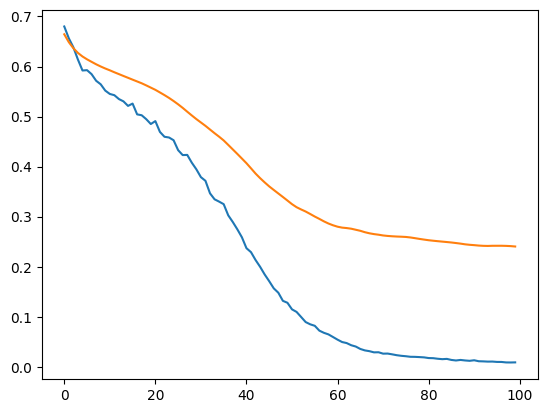

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # loss is training loss
plt.plot(history.history['val_loss']) # val_loss loss on the validation data / test loss

# Why we get variation in accuracy ?

because we randomly initialise the weights

weights are initialised using glorot uniform distribution